# Faltungsnetz Versuch 4: Unterschiedliche Strecken

## Einleitung

In diesen Versuch werden Faltungsnetze mit den Daten aus dem Datensatz 37 bis 42 trainiert. Die Daten wurden auf unterschiedlichen Routen erfasst. Beim Start und Ende der Datenerfassung zu einer Strecke überschneiden sich einige befahrene Wege. Diese Wege wurden also mehr als einmal befahren. Gelabelt wurden die Daten mit Fuzzy-Logik (siehe Notebook daten_labeln/fuzzyLogic.ipynb). 

## Versuchbeschreibung 

Zum Trainieren des Netzes ist es nötig das nur ein Teil der Bilder in den Hauptspeicher geladen wird, weil ansonsten der Speicherplatz nicht ausreicht bei 8GB RAM. Dafür wird die Keras Methode fit_generator() genutzt mit welchem eine Generator Methode Implementiert werden kann, welche so viele Bilder in der Anzahl der batch size (Stapelgröße) läd für einen Trainingsschritt. Die Daten sind so aufgeteilt und gemischt, dass 10% der Gesamtdaten zum Testen genutzt werden und die übrigen 90% werden aufgeteilt in 80% Trainingsdaten sowie 20% Validierungsdaten. Die Validierungsdaten werden als Performance Metrik genutzt am Ende des Trainings einer Epoche. Mit den Testdaten wird dann nochmals unabhängig von den Validierungsdaten das Faltungsnetz getestet.  

### Versuchsbeschreibung Versuch 4.1: Unterteilung der Fahrqualität in 4 Klassen

Die Trainingsdaten wurden klassifiziert in 4 Klassen nach der Fahrqualität. Für weitere Informationen zur Einordnung der Daten siehe Fuzzy Logik Versuch 2. Als Parameter für das Faltungsnetz wird als Vorlage das Model aus Faltungsnetz Versuch 1.9 genutzt. Die Anzahl der Epochen beträgt 20. Wenn sich nach Validierung Accuracy nach 3 Epochen nicht mehr erhöht wird das Training abgebrochen. 

### Ergebnis Versuch 4.1:

Wie in Tab. 1 zu sehen war der Versuch nicht sehr erfolgreich. Auf Abb. 1 rechte Seite ist zu sehen das die Trainings und Validierung Accuracy mit $\approx 0.33$ bzw. $\approx 33\%$ nicht sehr hoch ist. Das Faltungsnetz könnte nicht komplex genug sein oder die Trainingsdaten sind nicht aussagekräftig genug.

| | 
 --- | --- |
 <img src="../daten/abbildungen/trainingshistorieLossVersuch4_1.png" alt"Loss Trainingshistorie Versuch 4.1" /> | <img src="../daten/abbildungen/trainingshistorieAccuracyVersuch4_1.png" alt"Accuracy Trainingshistorie Versuch 4.1" />
Abbildung 1:  Trainingshistorie Versuch 4.1

### Versuchbeschreibung Versuch 4.2: Gleiche Anzahl an Trainingsdaten für jede Klasse

Es gibt eine unterschiedliche Anzahl an Repräsentanten für jede Klasse siehe Abb. 2. In diesen Versuch soll untersucht werden ob eine Verbesserung der Accuracy erzielt werden kann, wenn die Anzahl der Daten pro Klasse normiert werden. Für das Faltungsnetz werden die Parameter aus Versuch 4.1 genutzt.

<img src="../daten/abbildungen/histogrammKlassenVersuch4_2.png" alt="Histogramm Klassen Versuch 4.2" />
Abbildung 2: Histogramm der Klassen

### Ergebnis Versuch 4.2:

Auf Tab. 1 ist das relativ schlechte Ergebnis zu sehen von $\approx 25\%$ Accuracy. Ein Blick auf die Konfusionsmatrix aus Versuch 4.1 und 4.2 verrät, dass die Modelle vor allem die Klasse "sehr gut" voraussagen. Dies ist so zu interpretieren, dass das Faltungsnetz nicht geeignet ist für diese Aufgabe. Mit der Normierten Anzahl der Daten pro Klasse wurden auch andere Klassen vorrausgesagt.

| | 
 --- | --- |
 <img src="../daten/abbildungen/konfmatrixVersuch4_1.png" alt"Konfusionsmatrix aus Versuch 4.1" /> | <img src="../daten/abbildungen/konfmatrixVersuch4_2.png" alt"Konfusionsmatrix aus Versuch 4.2" />
Abbildung 3: Konfusionsmatrix Versuch 4.1 und 4.2

### Versuchbeschreibung Versuch 4.3:  Hypertuning

In diesem Versuch wurden die Daten wie in Versuch 4.2 beschrieben normiert damit die Anzahl an Daten pro Klasse gleich ist. 
Ziel ist es mit Hypertuning die Parameter des Faltungsnetzes zu optimieren. Dabei wird die Dropout Rate, die Anzahl der Faltungsschichten von 2 bis 4 und die Optimierungsfunktion sowie weitere Parameter mit Hyperopt gesucht. Die Anzahl an Durchläufen mit Hyperopt sind 100-mal. Mit jeweils 10 möglichen Epochen und Early Stopping.

### Ergebnis Versuch 4.3: 

Nach 67 Durchläufen mit Hyperopt kam es zu folgenden out of memory (OOM) Speicherfehler. 

         OOM when allocating tensor with shape[32,64,184,35] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
         
Die Ausführungszeit dauerte 11 Stunden und 53 Minuten. Durch den OOM Fehler ist es nicht möglich gewesen die besten gefundenen Parameter vollständig auszuwerten. Die beste erreichte Validierung Accuracy ist $0.4257$ (Trainings Accuracy gleich $0.396$). Mit 3 Faltungsschichten, ELU als Aktivierungsfunktion und Adam als Optimierungsfunktion. Der Versuch wurde nochmal durchgeführt siehe Tab. 1 und 3. Dabei wurden alle Parameter des aktuellen Modells auf der Konsole ausgegeben. Zudem wurde die Anzahl der Durchläufe auf 30 reduziert. Die Ausführungszeit betrug ca. 5 Stunden. Während des Versuches ist aufgefallen, das die zufällige Dropout-Rate häufig über $70\%$ ist. Beim nächsten Versuch sollte die mögliche Maximalrate nicht auf $100\%$ sondern auf $70\%$ festgesetzt werden. 

Auf Abb. 4 ist die Konfusionsmatrix mit den Testdaten zu sehen. Die vorhergesagten Klassen sind verteilter aber die Klasse "sehr gut" wird mit $56\%$ am häufigsten vorhergesagt.   

Schicht |             Ausgangsformat          | Anzahl der Parameter  |  
       --    |          ---                   |          ---          |
Conv2D                       | (368, 70, 32)  |          896          |       
Activation(ELU)              | (368, 70, 32)  |          0            |   
MaxPooling                   | (184, 35, 32)  |          0            |   
Dropout(0.26)                | (184, 35, 32)  |          0            |   
Conv2D                       | (184, 35, 64)  |         18496         |
Activation(ELU)              | (184, 35, 64)  |          0            |
MaxPooling                   | (92, 17, 64)   |          0            |
Dropout(0.12)                | (92, 17, 64)   |          0            |
Conv2D                       | (92, 17, 128)  |          73856        |    
Activation(ELU)              | (92, 17, 128)  |          0            | 
MaxPooling                   | (46, 8, 128)   |          0            | 
Dropout(0.16)                | (46, 8, 128)   |          0            | 
Flatten                      | (47104)        |          0            |    
Dense                        | (128)          |         6029440       |   
Activation(ELU)              | (128)          |          0            |   
Dropout(0.84)                | (128)          |          0            |         
Dense                        | (4)            |          516          |       
Activation                   | (4)            |          0            |
Tabelle 1: Parameter des besten gefundenen Faltungsnetz mit der Optimierungsfunktion Adam

<img src="../daten/abbildungen/konfmatrixVersuch4_3.png" alt"Konfusionsmatrix aus Versuch 4.3" />
Abbildung 4: Konfusionsmatrix Versuch 4.3 
 

### Versuchsbeschreibung Versuch 4.4: Unterteilung der  Geschwindigkeit

Die Annahme ist, dass bei höherer Geschwindigkeit die Bewegungsunschärfe bei den Bildaufnahmen steigt. In diesen Versuch wurden die Daten nicht nur nach der Fahrqualität unterteilt, sondern auch nach der gemessenen Geschwindigkeit in niedrige und hohe Geschwindigkeit. Dies ergibt dann 8 unterschiedliche Klassen. Die Daten wurden in Fuzzy Logik Versuch 3 gelabelt. In diesen Versuch wird mit Hypertuning nach Parametern für ein Faltungsnetz gesucht. Es wurden mit Hyperopt 80 Durchläufe ausgeführt. Als Erweiterung wurden auch die Stapelgrößen (batch size) 8, 16 und 32 als trainierbare Variable ausprobiert.

###  Ergebnis Versuch 4.4: 

Nach 65 Durchläufen mit Hyperopt kam es zu folgendem OOM Fehler.

         ResourceExhaustedError: OOM when allocating tensor with shape[32,128,92,17] and type float on  /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
         
Die Ausführungszeit dauerte bis zum dem Speicherfehler 22 Stunden und 44 Minuten. Das beste gefundene Neuronale Netz hatte eine Trainings Accuracy von $0.3151$ und eine $0.3114$ Validierungs Accuracy nach 10 Epochen. Da die Suche nicht beendet werden konnte wurde der Versuch Wiederholt mit 20 Durchläufen wegen der langen Laufzeit und um die Wahrscheinlichkeit eines OOM Fehler zu verringern. 

Mit den Parametern aus Tab. 2 konnte dann schließlich ein Faltungsnetz mit einer Accuracy von 0.2092 und einer Validierungs Accuracy von 0.2553 gefunden werden. 

Schicht |             Ausgangsformat          | Anzahl der Parameter  |  
       --    |          ---                   |          ---          |
Conv2D                       | (368, 70, 32)  |          896          |       
Activation(ELU)              | (368, 70, 32)  |          0            |   
MaxPooling(2 * 2)            | (184, 35, 32)  |          0            |   
Dropout (0.11)               | (184, 35, 32)  |          0            |   
Conv2D                       | (184, 35, 32)  |         9248          |
Activation(ELU)              | (184, 35, 32)  |          0            |
MaxPooling                   | (92, 17, 32)   |          0            |
Dropout(0.38)                | (92, 17, 32)   |          0            |
Conv2D                       | (92, 17, 64)   |          73856        |    
Activation(ELU)              | (92, 17, 64)   |          0            | 
MaxPooling                   | (46, 8, 64)    |          0            | 
Dropout(0.30)                | (46, 8, 64)    |          0            | 
Conv2D                       | (46, 8, 256)   |       147712          |
Activation(ELU)              | (46, 8, 256)   |          0            |
MaxPooling                   | (23, 4, 256)   |          0            |
Dropout(0.49)                | (23, 4, 256)   |          0            | 
Flatten                      | (23552)        |          0            | 
Dense                        | (64)           |         1507392       |   
Activation(ELU)              | (64)           |          0            |   
Dropout(0.36)                | (64)           |          0            |         
Dense                        | (8)            |          520          |       
Activation(ELU)              | (8)            |          0            |
Tabelle 2: Parameter des gefundenen Modells aus Versuch 4.4 mit der Optimierungsfunktion RMSprop und einer batch size von 16 


### Versuchsbeschreibung Versuch 4.5: Spezialisierte Faltungsnetze für einen Geschwindigkeitsbereich

In diesen Versuch wurde für den Geschwindigkeitsbereich hoch und niedrig nach der Klassifizierung aus dem Fuzzy Logik Versuch 3 ein Faltungsnetz trainiert. Dafür wurden die gefundenen Faltungsnetze aus Versuch 4.3 und 4.4 genutzt. Um die Versuche wiederholbar zu machen wurde als Gewichtsinitialisierung Glorot Uniform verwendet mit den Seed 42. In den ersten Teilversuch 4.5.1 und 2 wurden die Klassen mit der Geschwindigkeit "hoch" ausgewählt und ein Modell mit den Parametern aus Versuch 4.3 trainiert. Dann wurde der Versuch wiederholt mit dem Modell Parametern aus Versuch 4.4. Die Anzahl der Daten jeder Klasse betrug 9548. Anschließend wurde der Versuch 4.5.3 und 4 durchgeführt mit den Daten, welche mit einer "niedrigen" Geschwindigkeit erfasst wurden. Dabei gab es 9152 Daten pro Klasse.

### Ergebnis Versuch 4.5: 

Wie auf Tab. 3 zu sehen sind waren die Ergebnisse aus Versuch 4.5.1 bis 4.5.4 nicht vielversprechend. Mit dem Faltungsnetz Parametern aus Versuch 4.3 konnte ein höhere Test Accuracy erreicht werden als mit den aus Versuch 4.4. Im Vergleich zu Versuch 4.3 wurde aber nicht als Gewichtinitialisierung Glorot Uniform genutzt. Eine Erklärung für das schlechte Ergebnis liegt wahrscheinlich an den relativ wenigen Daten pro Klasse zum Vergleich existierten bei Versuch 4.3 18924 Daten jeder Klasse.

### Ergebnisse

Versuch Nr. | Trainings Accuracy | Trainings Loss | Validierungs Accuracy | Validierungs Loss | Test Accuracy | Test Loss |
  --- | --- | --- | --- | --- |
4.1   | 0.3303 | 1.3376 | 0.3306 | 1.339  | 0.3321 | 1.3378  |
4.2   | 0.2492 | 1.3933 | 0.2492 | 1.3889 | 0.2464 | 1.3886  | 
4.3   | 0.3119 | 1.3639 | 0.3727 | 1.3719 | 0.3669 | 1.3798  | 
4.4   | 0.2092 | 1.9879 | 0.2553 | 2.0331 |        |         |
4.5.1 | 0.2478 | 1.3950 | 0.2949 | 1.3853 | 0.2873 | 1.3854  |
4.5.2 | 0.2497 | 1.4023 | 0.2674 | 1.3942 | 0.2534 | 1.3962  |     
4.5.3 | 0.2532 | 1.3940 | 0.2635 | 1.3877 | 0.2653 | 1.3881  |
4.5.4 | 0.2468 | 1.6232 | 0.2620 | 1.3917 | 0.2516 | 1.39642 | 
Tabelle 3: Ergebnisse der Versuche

In [12]:
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, rand
from hyperas import optim
from hyperas.distributions import uniform, choice
import pandas
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import cv2
import numpy as np

In [13]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import initializers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.models import load_model
import keras.callbacks as cb
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [14]:
featuresDf = pandas.read_csv(filepath_or_buffer="../daten/merkmale_datensatz_37_bis_42/merkmaleMitLabelnFuzzyVersuch4.csv")

In [15]:
# Nummer des aktuellen Versuchs
experimentNumber = "6"

In [22]:
# Hier können die Datensätze ausgewählt werden
datasets = ['37','38','39','40','41','42']
# Die Pfade zu den Ordnern in welchem sich die Bilder befinden
paths = []
# Liste mit Pfaden zu den Bildern
imagePaths = []

In [23]:
for dataset in datasets: # Für jeden Datensatz merke Pfad
    paths.append("E:/bachelor/daten/" + dataset + "/zugeschnitten/")
for path in paths: # Für jeden Pfad hole die Namen der Ordner
    folders = os.listdir(path)
    folders = sorted(folders, key=int) #sortiert die Reihenfolge de Ordner aufsteifend
    print(path)
    print("Bilder aus folgenden Ordnern werden geladen: " + str(folders))
    for folder in folders: # Aus der Liste der Ordner wird ein Ordner ausgewählt
        filesPath = path + folder + "/"
        files = os.listdir(filesPath)
        print("Ordner der geladen wird: " + str(folder))
        for name in files: # Ein Dateiname aus diesem Ordner
            if "jpg" not in name:
                continue
            imagePaths.append(filesPath + name)

E:/bachelor/daten/37/zugeschnitten/
Bilder aus folgenden Ordnern werden geladen: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
Ordner der geladen wird: 1
Ordner der geladen wird: 2
Ordner der geladen wird: 3
Ordner der geladen wird: 4
Ordner der geladen wird: 5
Ordner der geladen wird: 6
Ordner der geladen wird: 7
Ordner der geladen wird: 8
Ordner der geladen wird: 9
Ordner der geladen wird: 10
Ordner der geladen wird: 11
Ordner der geladen wird: 12
Ordner der geladen wird: 13
Ordner der geladen wird: 14
E:/bachelor/daten/38/zugeschnitten/
Bilder aus folgenden Ordnern werden geladen: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']
Ordner der geladen wird: 1
Ordner der geladen wird: 2
Ordner der geladen wird: 3
Ordner der geladen wird: 4
Ordner der geladen wird: 5
Ordner der geladen wird: 6
Ordner der geladen wird: 7
Ordner der geladen wird: 8
Ordner der geladen wird: 9
Ordner der g

In [24]:
numberOfChannels  = 3           # Anzahl der Farbkanäle
classNames = ['sehr gut','gut','schlecht','sehr schlecht'] # Namen der Klassen
yLabels           = np.array(0) # Labels / Klassen zuordnung
yShuffle          = np.array(0) # Labels mit der Methode shuffle() vermischt 
xShuffle          = np.array(0) # Bilder zum trainieren mit shuffle() vermischt
xTrain            = np.array(0) # Trainingsdaten (Bilder) 
xTest             = np.array(0) # Testdaten (Bilder)
yTrain            = np.array(0) # Klassen zuordnungen (Labels) für xTrain
yTest             = np.array(0) # Klassen zuordnung (Lables) für xTest

In [25]:
yLabels = np_utils.to_categorical(featuresDf['Klasse'], 0)

In [26]:
# Setzten des RandomState um reproduzierbare Ergebnisse zu erzielen.
np.random.seed(42)

In [36]:
yShuffle.shape

(36870, 3)

In [32]:
# Mischen der Trainingsdaten
#xShuffle, yShuffle = shuffle(imagePaths,yLabels)
# Aufteilung in Trainings und Testdaten
xTrain, xTest, yTrain, yTest = train_test_split(xShuffle, yShuffle, test_size=0.1)

In [33]:
xTrain, xVal, yTain, yVal = train_test_split(xTrain, yTrain, test_size=0.2) 

In [34]:
# Diese Funktion läd Bilder in den Hauptspeicher
# imagesPaths: Liste mit Pfaden zu den Bildern != null
def imageLoader(imagePaths):
    images = []
    for path in imagePaths:
        images.append(cv2.imread(path))
    imagesNp = np.array(images)
    imagesNp = imagesNp.astype('float32')
    # Transfomierung der Bildpunkte auf den Wetebereich von 0 bis 1
    imagesNp /= 255
    return imagesNp

In [35]:
# Läd Trainingsdaten in batches
def dataLoader(imagePaths, features, batchSize):
    imagesCount= len(imagePaths)  
    while True:
        batchStart = 0
        batchEnd = batchSize
        while batchStart < imagesCount:
            limit = min(batchEnd, imagesCount)
            x = imageLoader(imagePaths[batchStart:limit])
            y = features[batchStart:limit]
            yield (x,y) 
            batchStart += batchSize   
            batchEnd += batchSize

In [84]:
# Parameter für das CNN
inputShape     = (368, 70, 3)   # Eingangs Array-Form 
numNeuronsC1   = 32                # Anzahl der Filter / 1 Faltungsschicht
numNeuronsC2   = 64                # Anzahl der Filter / 2 Faltungsschicht
numNeuronsC3   = 128                # Anzahl der Filter / 3 Faltungsschicht
numNeuronsD1   = 128                # Anzahl der Neuronen des Fully connected layer - vollverbundene Schicht
poolSize       = 2                 # Größe der Pooling-Layer
convKernelSize = 3                 # Größe des Faltungskern n*n
batchSize      = 32

In [90]:
modelCNN = Sequential()
modelCNN.add(Conv2D(numNeuronsC1, (convKernelSize, convKernelSize), padding='same', input_shape=inputShape,kernel_initializer=initializers.glorot_uniform(seed=42)))
modelCNN.add(Activation("elu"))
modelCNN.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
modelCNN.add(Dropout(0.26))
modelCNN.add(Conv2D(numNeuronsC2, (convKernelSize, convKernelSize), padding='same', kernel_initializer=initializers.glorot_uniform(seed=42)))
modelCNN.add(Activation("elu"))
modelCNN.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
modelCNN.add(Dropout(0.12))
modelCNN.add(Conv2D(numNeuronsC3, (convKernelSize, convKernelSize), padding='same', kernel_initializer=initializers.glorot_uniform(seed=42)))
modelCNN.add(Activation("elu"))
modelCNN.add(MaxPooling2D(pool_size=(poolSize, poolSize)))       
modelCNN.add(Dropout(0.16))
modelCNN.add(Flatten())
modelCNN.add(Dense(numNeuronsD1, kernel_initializer=initializers.glorot_uniform(seed=42)))
modelCNN.add(Activation("elu"))
modelCNN.add(Dropout(0.84)) 
modelCNN.add(Dense(3, kernel_initializer=initializers.glorot_uniform(seed=42)))
modelCNN.add(Activation('softmax'))
            
modelCNN.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

earlyStopping  = cb.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='max')
checkpointSafe = cb.ModelCheckpoint('ergebnisse_versuch4/modell_versuch4_6', monitor='val_acc', save_best_only=True)   
hist = modelCNN.fit_generator(dataLoader(xTrain, yTrain, batchSize), epochs=20, steps_per_epoch=(int(len(xTrain)/batchSize)),
              validation_data=dataLoader(xVal, yVal, batchSize), validation_steps=(int(len(xVal)/batchSize)), callbacks=[earlyStopping,checkpointSafe])

score, acc = modelCNN.evaluate_generator( dataLoader(xTest, yTest, batchSize), steps=(int(len(xTest)/batchSize)))
print('Test score: '    +  str(score))
print('Test accuracy: ' +  str(acc)  )

Epoch 1/20
829/829 [==============================] - 126s 152ms/step - loss: 1.3748 - acc: 0.3296 - val_loss: 1.1275 - val_acc: 0.3344
Epoch 2/20
829/829 [==============================] - 124s 150ms/step - loss: 1.1315 - acc: 0.3428 - val_loss: 1.1076 - val_acc: 0.3229
Epoch 3/20
829/829 [==============================] - 125s 150ms/step - loss: 1.1095 - acc: 0.3344 - val_loss: 1.1016 - val_acc: 0.3343
Epoch 4/20
829/829 [==============================] - 125s 150ms/step - loss: 1.1046 - acc: 0.3312 - val_loss: 1.1028 - val_acc: 0.3354
Epoch 5/20
829/829 [==============================] - 125s 150ms/step - loss: 1.1078 - acc: 0.3330 - val_loss: 1.1029 - val_acc: 0.3349
Epoch 6/20
829/829 [==============================] - 125s 151ms/step - loss: 1.1198 - acc: 0.3378 - val_loss: 1.1100 - val_acc: 0.3350
Epoch 7/20
829/829 [==============================] - 125s 151ms/step - loss: 1.1234 - acc: 0.3319 - val_loss: 1.1019 - val_acc: 0.3354
Epoch 8/20
829/829 [============================

In [ ]:
modelCNN.summary()

<Figure size 432x288 with 0 Axes>

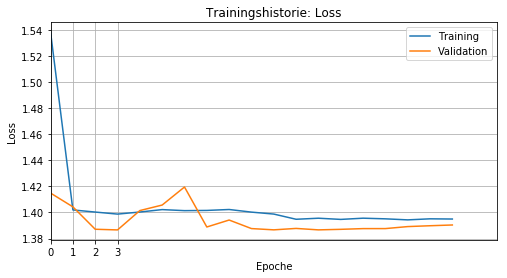

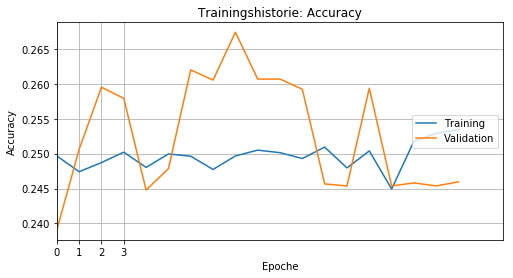

In [146]:
# Plot Modell Historie Loss und Accuracy
plt.figure(1)
plt.figure(figsize=(8,4))
plt.title('Trainingshistorie: Loss')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.xlim(0,20)
plt.grid(True)
#plt.savefig("trainingshistorieLossVersuch4_" + experimentNumber + ".png")
plt.xticks(np.arange(0, 3.1, step=1))
plt.figure(2)
plt.figure(figsize=(8,4))
plt.title('Trainingshistorie: Accuracy')
plt.xticks()
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='right')
plt.xlim(0,20)
plt.xticks(np.arange(0, 3.1, step=1))
plt.grid(True)
#plt.savefig("trainingshistorieAccuracyVersuch4_" + experimentNumber + ".png")
plt.show()

In [147]:
# Läd Testdaten
def testDataLoader(imagePaths, batchSize):
    imagesCount= len(imagePaths)  
    while True:
        batchStart = 0
        batchEnd = batchSize
        while batchStart < imagesCount:
            limit = min(batchEnd, imagesCount)
            x = imageLoader(imagePaths[batchStart:limit])
            yield (x) 
            batchStart += batchSize   
            batchEnd += batchSize

In [61]:
# Läd Modell
modell1 = load_model('ergebnisse_versuch4/modell_versuch4_5_4')

In [62]:
modell1.evaluate_generator( dataLoader(xTest, yTest, 32), steps=int(len(xTest)/32))

[1.3964286875306515, 0.25164473684210525]

In [25]:
modell1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 366, 68, 32)       896       
_________________________________________________________________
activation_1 (Activation)    (None, 366, 68, 32)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 183, 34, 32)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 183, 34, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 181, 32, 32)       9248      
_________________________________________________________________
activation_2 (Activation)    (None, 181, 32, 32)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 16, 32)        0         
__________

In [65]:
# Bei der Verwendung von predict_generator werden die daten gemischt 
validPreds = []
imageList = []
for path in xTest:
    imageList = []   
    img = cv2.imread(cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB))
    img = np.array(img)
    img = img.astype('float32')
    img /= 255
    imageList.append(img)
    validPreds.append(modell1.predict(np.asarray(imageList)))

[[1786    0    0   78]
 [1841    1    0   60]
 [1864    0    0   66]
 [1795    0    1   78]]


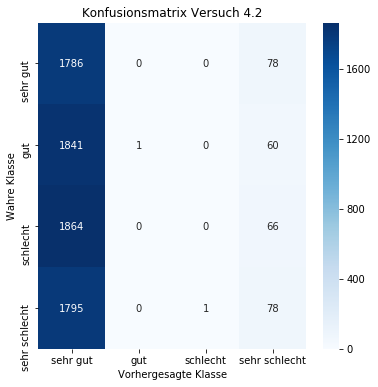

In [66]:
# Konfusionsmatrix
validPredArray = np.argmax(np.vstack(validPreds), axis=1)
yTestMax = np.argmax(yTest,axis=1)
cnfMatrix = confusion_matrix(yTestMax, validPredArray)
print(cnfMatrix)
fig, ax = plt.subplots(figsize=(6,6)) 
ax = sns.heatmap(cnfMatrix, fmt="d", cmap=plt.cm.Blues, ax=ax , annot=True)
ax.set_xticklabels(classNames)
ax.set_yticklabels(classNames)
plt.title('Konfusionsmatrix Versuch 4.2')
plt.ylabel('Wahre Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.savefig('konfmatrixVersuch4_' +  experimentNumber + '.png')
plt.show()

### Versuch 2

In [66]:
featuresDf["Klasse"].value_counts()

0    38644
1    37656
2    20566
3    18924
Name: Klasse, dtype: int64

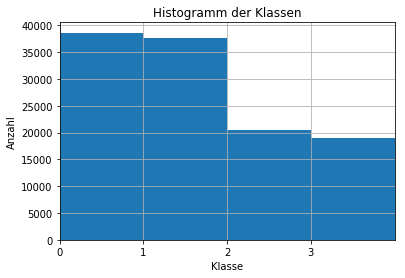

In [75]:
plt.xticks(np.arange(0, 3.1, step=1))
plt.xlim(0,4)
plt.xlabel("Klasse")
plt.ylabel("Anzahl")
plt.title("Histogramm der Klassen")
featuresDf["Klasse"].hist(bins=[0,1,2,3,4])
plt.savefig("histogrammKlassenVersuch4_2.png")

In [29]:
featuresDf["Klasse"].value_counts()

1    63909
0    39591
2    12290
Name: Klasse, dtype: int64

In [30]:
# Die Zelle Normiert die Anzahl der Repräsentanten pro Klasse
class1Number = 0
class2Number = 0 
class3Number = 0
class4Number = 0
maxClasses = featuresDf["Klasse"].value_counts().min()
indexToDelete = [] 
i = -1
for label in yShuffle:
    i = i + 1
    labelNumber = np.argmax(label,axis=0)
    if labelNumber == 0 and class1Number < maxClasses:
        class1Number = class1Number + 1
        continue
    elif labelNumber == 0:
        indexToDelete.append(i)
    if labelNumber == 1 and class2Number < maxClasses:
        class2Number = class2Number + 1
        continue
    elif labelNumber == 1:
        indexToDelete.append(i)
    if labelNumber == 2 and class3Number < maxClasses:
        class3Number = class3Number + 1
        continue
    elif labelNumber == 2:
        indexToDelete.append(i)
    if labelNumber == 3 and class4Number < maxClasses:
        class4Number = class4Number + 1
        continue        
    elif labelNumber == 3:
        indexToDelete.append(i)
xShuffle = [i for j, i in enumerate(xShuffle) if j not in indexToDelete]
yShuffle = [i for j, i in enumerate(yShuffle) if j not in indexToDelete]
yShuffle = np.asarray(yShuffle)

In [3]:
# Eine Funktion die das zu optimierende Keras-Modell beschreibt
# Die vorgehensweise mit einer Funktion ist nach der Dokumentation von Hyperas vorgegeben 
# siehe https://github.com/maxpumperla/hyperas
def model(xTrain, xVal, yTrain, yVal):
    # Parameter für das CNN
    inputShape     = (368, 70, 3)   # Eingangs Array-Form 
    numNeuronsC1   = 32                # Anzahl der Filter / 1 Faltungsschicht
    poolSize       = 2                 # Größe der Pooling-Layer
    convKernelSize = 3                 # Größe des Faltungskern n*n
    batchSize      = {{choice([8, 16, 32])}}
    print("Stapelgroesse (batchSize): " + str(batchSize))
    
    model = Sequential()
    layerCountTuning = {{choice(['2Layer','3Layer','4Layer'])}}
    print("Anzahl der Faltungsschichten: " + layerCountTuning)
    af = {{choice(['relu', 'elu'])}}
    print("Aktivierungsfunktion: " + af)
    optf = {{choice(['RMSprop','Adam'])}}
    print("Optimierungsfunktion: " + optf)
    model.add(Conv2D(numNeuronsC1, (convKernelSize, convKernelSize), padding='same', input_shape=inputShape))
    model.add(Activation(af))
    model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
    dropoutrate1 = {{uniform(0, 0.70)}}
    print("Dropout-Rate Faltungsschicht 1: " + str(dropoutrate1))
    model.add(Dropout(dropoutrate1))
    
    if layerCountTuning == '2Layer' or layerCountTuning == '3Layer' or layerCountTuning == '4Layer':
        filterCount2 = {{choice([32, 64])}}
        print("Anzahl der Filter-Maps Faltungsschicht 2: " + str(filterCount2))
        model.add(Conv2D(filterCount2, (convKernelSize, convKernelSize), padding='same'))
        model.add(Activation(af))
        model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
        dropoutrate2 = {{uniform(0, 0.70)}}        
        print("Dropout-Rate Faltungsschicht 2: " + str(dropoutrate2))
        model.add(Dropout(dropoutrate2))
    
    if layerCountTuning == '3Layer' or layerCountTuning == '4Layer':
        print("Anzahl der Faltungsschichten: " + layerCountTuning)
        filterCount3 = {{choice([64, 128])}}
        print("Anzahl der Filter-Maps Faltungsschicht 3: " + str(filterCount3))
        model.add(Conv2D(filterCount3, (convKernelSize, convKernelSize), padding='same'))
        model.add(Activation(af))
        model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
        dropoutrate3 = {{uniform(0, 0.70)}}        
        print("Dropout-Rate Faltungsschicht 3: " + str(dropoutrate3))
        model.add(Dropout(dropoutrate3))

    if layerCountTuning == '4Layer':
        filterCount4 = {{choice([128, 256])}}
        print("Anzahl der Filter-Maps Faltungsschicht 4: " + str(filterCount4))
        model.add(Conv2D(filterCount4, (convKernelSize, convKernelSize), padding='same'))
        model.add(Activation(af))
        model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
        dropoutrate4 = {{uniform(0, 0.70)}}        
        print("Dropout-Rate Faltungsschicht 4: " + str(dropoutrate4))
        model.add(Dropout(dropoutrate4)) 

    model.add(Flatten())
    dims4 = {{choice([64, 128, 256])}}
    print("Anzahl der Neuronen des Fully Connected Layer: " + str(dims4))    
    model.add(Dense(dims4))
    model.add(Activation(af))
    dropoutFull = {{uniform(0, 0.70)}}  
    print("Dropout-Rate Fully Connected Layer: " + str(dropoutFull))
    model.add(Dropout(dropoutFull)) 
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Diese Funktion läd Bilder in den Hauptspeicher
    # imagesPaths: Liste mit Pfaden zu den Bildern != null
    def imageLoader(imagePaths):
        images = []
        for path in imagePaths:
            images.append(cv2.imread(path))    
        imagesNp = np.array(images)
        imagesNp = imagesNp.astype('float32')
        imagesNp /= 255
        return imagesNp

    # Läd Trainingsdaten in batches
    def dataLoader(imagePaths, features, batchSize):
        imagesCount= len(imagePaths)  
        while True:
            batchStart = 0
            batchEnd = batchSize
            while batchStart < imagesCount:
                limit = min(batchEnd, imagesCount)
                x = imageLoader(imagePaths[batchStart:limit])
                y = features[batchStart:limit]
                yield (x,y) 
                batchStart += batchSize   
                batchEnd += batchSize
                
    model.compile(loss='categorical_crossentropy', optimizer=optf, metrics=["accuracy"])
    print('Faltungsnetz wird trainiert...')
    # Early Stopping unterbricht das Training, wenn nach 3 Epochen die Kostenfunktion nicht weiter minimiert werden konnte 
    earlyStopping = cb.EarlyStopping(monitor='val_acc', patience=3, verbose=1, mode='max')
    checkpointSafe = cb.ModelCheckpoint('ergebnisse_versuch4/modell_versuch4_4', monitor='val_acc', save_best_only=True)   
    model.fit_generator(dataLoader(xTrain, yTrain, batchSize), epochs=10, steps_per_epoch=(int(len(xTrain)/batchSize)),
              validation_data=dataLoader(xVal, yVal, batchSize), validation_steps=(int(len(xVal)/batchSize)), callbacks=[earlyStopping,checkpointSafe])
    score, acc = model.evaluate_generator( dataLoader(xVal, yVal, batchSize), steps=(int(len(xVal)/batchSize)))
    print('Test score: ' + str(score))
    print('Test accuracy: ' +  str(acc))
    # Die Rückgabewerte werden verarbeitet von Hyperas
    # loss ist die Kostenfunktion welche minimiert werden soll mit Hyperas
    # status (STATUS_OK) gibt an das, dass Modell erfolgreich ausgeführt wurde
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [4]:
def data():
    # Hier können die Datensätze ausgewählt werden
    datasets = ['37','38','39','40','41','42']
    # Die Pfade zu den Ordnern in welchem sich die Bilder befinden
    paths = []
    # Liste mit Pfaden zu den Bildern
    imagePaths = []
    for dataset in datasets: # Für jeden Datensatz merke Pfad
        paths.append("C:/Users/morro/Documents/datenRoh/" + dataset + "/zugeschnitten/")
    for path in paths: # Für jeden Pfad hole die Namen der Ordner
        folders = os.listdir(path)
        folders = sorted(folders, key=int) #sortiert die Reihenfolge de Ordner aufsteifend
        print(path)
        print("Bilder aus folgenden Ordnern werden geladen: " + str(folders))
        for folder in folders: # Aus der Liste der Ordner wird ein Ordner ausgewählt
            filesPath = path + folder + "/"
            files = os.listdir(filesPath)
            print("Ordner der geladen wird: " + str(folder))
            for name in files: # Ein Dateiname aus diesem Ordner
                if "jpg" not in name:
                    continue
                imagePaths.append(filesPath + name)
    # Y Klassen Labels zuweisen
    featuresDf = pandas.read_csv(filepath_or_buffer="../daten/merkmale_datensatz_37_bis_42/merkmaleMitLabelnFuzzyVersuch3.csv")
    yLabels = np_utils.to_categorical(featuresDf['Klasse'], 0)
    # Setzten des RandomState um reproduzierbare Ergebnisse zu erzielen.
    np.random.seed(42)
    # Mischen der Trainingsdaten
    xShuffle, yShuffle = shuffle(imagePaths,yLabels)
    class1Number = 0
    class2Number = 0 
    class3Number = 0
    class4Number = 0
    class5Number = 0
    class6Number = 0
    class7Number = 0
    class8Number = 0
    maxClasses = featuresDf["Klasse"].value_counts().min()
    indexToDelete = [] 
    i = -1
    for label in yShuffle:
        i = i + 1
        labelNumber = np.argmax(label,axis=0)
        if labelNumber == 0 and class1Number < maxClasses:
            class1Number = class1Number + 1
            continue
        elif labelNumber == 0:
            indexToDelete.append(i)
        if labelNumber == 1 and class2Number < maxClasses:
            class2Number = class2Number + 1
            continue
        elif labelNumber == 1:
            indexToDelete.append(i)
        if labelNumber == 2 and class3Number < maxClasses:
            class3Number = class3Number + 1
            continue
        elif labelNumber == 2:
            indexToDelete.append(i)
        if labelNumber == 3 and class4Number < maxClasses:
            class4Number = class4Number + 1
            continue        
        elif labelNumber == 3:
            indexToDelete.append(i)
        if labelNumber == 4 and class5Number < maxClasses:
            class5Number = class5Number + 1
            continue
        elif labelNumber == 4:
            indexToDelete.append(i)
        if labelNumber == 5 and class6Number < maxClasses:
            class6Number = class6Number + 1
            continue
        elif labelNumber == 5:
            indexToDelete.append(i)
        if labelNumber == 6 and class7Number < maxClasses:
            class7Number = class7Number + 1
            continue
        elif labelNumber == 6:
            indexToDelete.append(i)
        if labelNumber == 7 and class8Number < maxClasses:
            class8Number = class8Number + 1
            continue
        elif labelNumber == 7:
            indexToDelete.append(i)

    xShuffle = [i for j, i in enumerate(xShuffle) if j not in indexToDelete]
    yShuffle = [i for j, i in enumerate(yShuffle) if j not in indexToDelete]
    yShuffle = np.asarray(yShuffle)
    # Aufteilung in Trainings und Testdaten
    xTrain, xTest, yTrain, yTest = train_test_split(xShuffle, yShuffle, test_size=0.1)
    xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.2)
    return xTrain, xVal, yTrain, yVal

In [5]:
# Die Hyperas Methode optim sucht im Suchraum die Parameter 
# Bei einer Änderung des Methodenrumpf der Methode model() muss der Notebook Kernel neu gestartet werden
bestRun, bestModel = optim.minimize(model=model,               
                                          data=data,
                                          algo=rand.suggest,   # Algorithmus: Random Search
                                          max_evals=20,          
                                          trials=Trials(),      # eine Liste von Verzeichnissen, die alles über die Suche enthalten.
                                          notebook_name='CNN_experiment4')  # Der Name des Notebooks sollte als String angegeben werden
print(bestRun)

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    from hyperopt import Trials, STATUS_OK, rand
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import uniform, choice
except:
    pass

try:
    import pandas
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import matplotlib.lines as mlines
except:
    pass

try:
    import os
except:
    pass

try:
    import cv2
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation, Flatten
except:
    pass

try:
    from keras.layers.convolutional import Conv2D, MaxPooling2D
except:
    pass

try:
    from keras.optimizers import RMSprop
except:
    pass

try:
    from keras.models import

Ordner der geladen wird: 6
Ordner der geladen wird: 7
Ordner der geladen wird: 8
Ordner der geladen wird: 9
C:/Users/morro/Documents/datenRoh/40/zugeschnitten/
Bilder aus folgenden Ordnern werden geladen: ['1', '2', '3', '4', '5', '6', '7']
Ordner der geladen wird: 1
Ordner der geladen wird: 2
Ordner der geladen wird: 3
Ordner der geladen wird: 4
Ordner der geladen wird: 5
Ordner der geladen wird: 6
Ordner der geladen wird: 7
C:/Users/morro/Documents/datenRoh/41/zugeschnitten/
Bilder aus folgenden Ordnern werden geladen: ['1', '2', '3']
Ordner der geladen wird: 1
Ordner der geladen wird: 2
Ordner der geladen wird: 3
C:/Users/morro/Documents/datenRoh/42/zugeschnitten/
Bilder aus folgenden Ordnern werden geladen: ['1', '2', '3', '4', '5', '6', '7', '8']
Ordner der geladen wird: 1
Ordner der geladen wird: 2
Ordner der geladen wird: 3
Ordner der geladen wird: 4
Ordner der geladen wird: 5
Ordner der geladen wird: 6
Ordner der geladen wird: 7
Ordner der geladen wird: 8
Stapelgroesse (batchSi

Epoch 2/10
1647/1647 [==============================] - 115s 70ms/step - loss: 14.0890 - acc: 0.1259 - val_loss: 14.1524 - val_acc: 0.1220
Epoch 3/10
1647/1647 [==============================] - 114s 69ms/step - loss: 14.0887 - acc: 0.1259 - val_loss: 14.1553 - val_acc: 0.1218
Epoch 4/10
1647/1647 [==============================] - 114s 70ms/step - loss: 14.0896 - acc: 0.1259 - val_loss: 14.1504 - val_acc: 0.1221
Epoch 5/10
1647/1647 [==============================] - 115s 70ms/step - loss: 14.0881 - acc: 0.1259 - val_loss: 14.1504 - val_acc: 0.1221
Epoch 6/10
1647/1647 [==============================] - 114s 69ms/step - loss: 14.0887 - acc: 0.1259 - val_loss: 14.1504 - val_acc: 0.1221
Epoch 7/10
1647/1647 [==============================] - 115s 70ms/step - loss: 14.0893 - acc: 0.1259 - val_loss: 14.1504 - val_acc: 0.1221
Epoch 00007: early stopping
Test score: 14.152354351795502
Test accuracy: 0.12195863746958638
Stapelgroesse (batchSize): 32
Anzahl der Faltungsschichten: 4Layer
Aktiv

6589/6589 [==============================] - 153s 23ms/step - loss: 2.0797 - acc: 0.1226 - val_loss: 2.0796 - val_acc: 0.1241
Epoch 4/10
6589/6589 [==============================] - 152s 23ms/step - loss: 2.0797 - acc: 0.1228 - val_loss: 2.0796 - val_acc: 0.1240
Epoch 5/10
6589/6589 [==============================] - 152s 23ms/step - loss: 2.0797 - acc: 0.1228 - val_loss: 2.0796 - val_acc: 0.1241
Epoch 00005: early stopping
Test score: 2.079620116250618
Test accuracy: 0.12393746205221615
Stapelgroesse (batchSize): 32
Anzahl der Faltungsschichten: 3Layer
Aktivierungsfunktion: relu
Optimierungsfunktion: Adam
Dropout-Rate Faltungsschicht 1: 0.4360259891153708
Anzahl der Filter-Maps Faltungsschicht 2: 64
Dropout-Rate Faltungsschicht 2: 0.4074207844976787
Anzahl der Faltungsschichten: 3Layer
Anzahl der Filter-Maps Faltungsschicht 3: 128
Dropout-Rate Faltungsschicht 3: 0.28655612343287196
Anzahl der Neuronen des Fully Connected Layer: 256
Dropout-Rate Fully Connected Layer: 0.184732581606787

In [54]:
bestModel.save("ergebnisse_versuch4/modell_versuch4_4")

In [6]:
bestModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 368, 70, 32)       896       
_________________________________________________________________
activation_6 (Activation)    (None, 368, 70, 32)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 184, 35, 32)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 184, 35, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 184, 35, 32)       9248      
_________________________________________________________________
activation_7 (Activation)    (None, 184, 35, 32)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 92, 17, 32)        0         
__________

In [42]:
bestModel.evaluate_generator( dataLoader(xVal, yVal, 16), steps=int(len(xTest)/32))

[2.0056098046010002, 0.22286184210526316]

In [24]:
# Bei der Verwendung von predict_generator werden die daten gemischt 
validPreds = []
imageList = []
for path in xTest:
    imageList = []   
    img = cv2.imread(path)
    img = np.array(img)
    img = img.astype('float32')
    img /= 255
    imageList.append(img)
    validPreds.append(bestModel.predict(np.asarray(imageList)))

[[1550   36  248   30]
 [1188   85  557   72]
 [ 876  137  704  213]
 [ 632  164  638  440]]


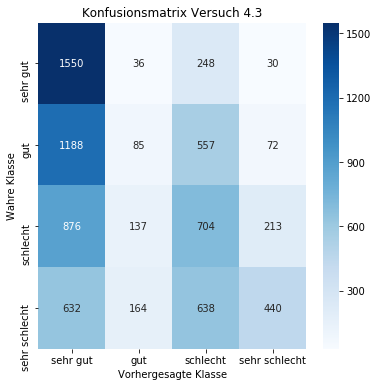

In [27]:
# Konfusionsmatrix
validPredArray = np.argmax(np.vstack(validPreds), axis=1)
yTestMax = np.argmax(yTest,axis=1)
cnfMatrix = confusion_matrix(yTestMax, validPredArray)
print(cnfMatrix)
fig, ax = plt.subplots(figsize=(6,6)) 
ax = sns.heatmap(cnfMatrix, fmt="d", cmap=plt.cm.Blues, ax=ax , annot=True)
ax.set_xticklabels(classNames)
ax.set_yticklabels(classNames)
plt.title('Konfusionsmatrix Versuch 4.' + experimentNumber)
plt.ylabel('Wahre Klasse')
plt.xlabel('Vorhergesagte Klasse')
#plt.savefig('konfmatrixVersuch4_' +  experimentNumber + '.png')
plt.show()

In [57]:
from mpl_toolkits.axes_grid1 import ImageGrid

In [77]:
lowVibration = []
highVibration = []
medianVibration = []
index = 0
indexMax = 1000
for label in yTest:      
    labelNumber = np.argmax(label,axis=0)
    img = cv2.imread(xTest[index])
    if labelNumber == 0:
        lowVibration.append(img)
    elif labelNumber == 1:
        highVibration.append(img)
    elif labelNumber == 2:
        highVibration.append(img)
    index = index + 1
    if index == indexMax:
        break

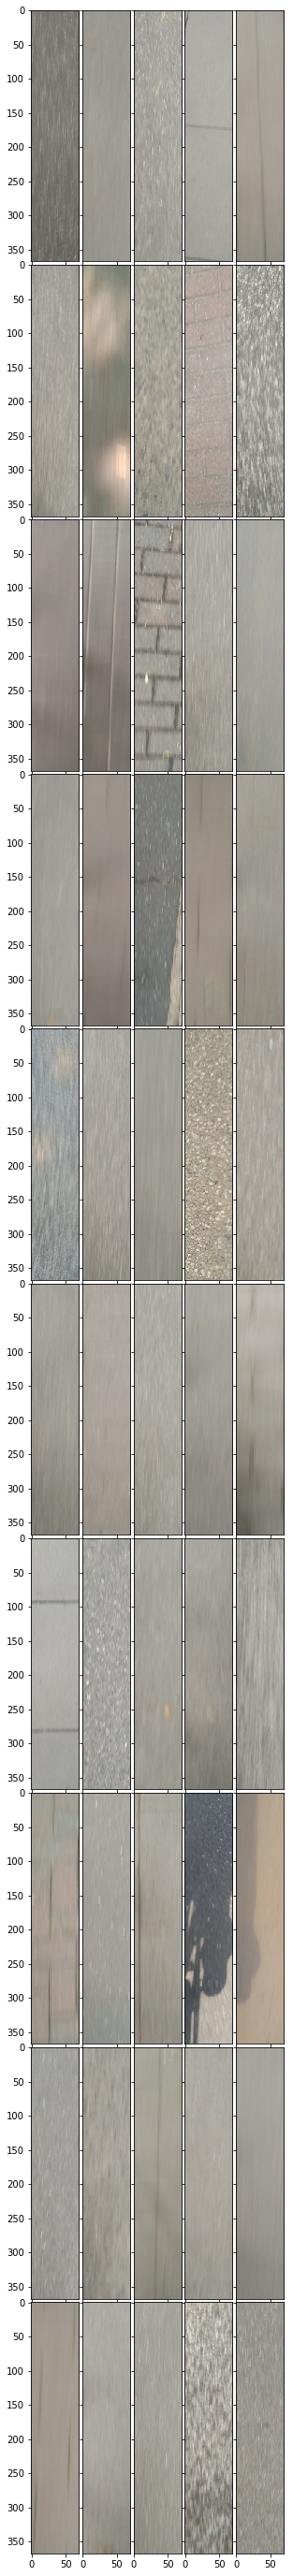

In [82]:
fig = plt.figure(1,figsize=(50,50))
grid = ImageGrid(fig, 111, nrows_ncols=(10, 5), axes_pad=0.05)
imageToShow = 50
for i, img in enumerate(lowVibration[50+0: 50+imageToShow]):
    ax = grid[i]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))